In [3]:
from skimage.morphology import skeletonize, medial_axis
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import math

In [4]:
f_name = 'mask_test_tao3.jpg'
fdg_mask = cv2.imread(f_name, cv2.IMREAD_GRAYSCALE)
res, bdg_mask = cv2.threshold(fdg_mask, 10, 1, cv2.THRESH_BINARY_INV)
cv2.rectangle(bdg_mask, (0, 0), (bdg_mask.shape[1] - 1, bdg_mask.shape[0] - 1), 0, 1)
plt.imshow(bdg_mask)
plt.plot()

[]

[]

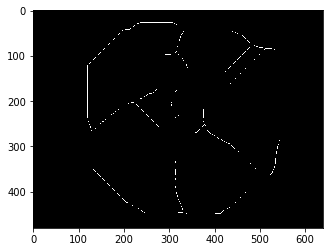

In [5]:
# perform skeletonization
skeleton = skeletonize(bdg_mask)
plt.imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
plt.plot()

In [6]:
skeleton

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [7]:
np.where(skeleton == True)

(array([ 27,  27,  27, ..., 449, 449, 449]),
 array([236, 237, 238, ..., 399, 400, 401]))

In [8]:
skel, dist = medial_axis(bdg_mask, return_distance=True)

In [9]:
dist_on_skel = dist * skel

In [10]:
skel

array([[False, False, False, ..., False, False, False],
       [False,  True, False, ..., False,  True, False],
       [False, False,  True, ...,  True, False, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False,  True, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [11]:
dist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 2., ..., 2., 1., 0.],
       ...,
       [0., 1., 2., ..., 2., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

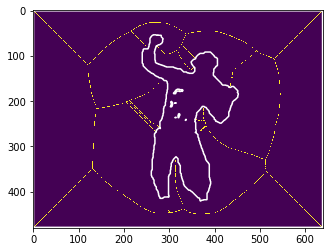

In [12]:
plt.imshow(skel, interpolation='nearest')
plt.contour(bdg_mask, [0.5], colors='w')
plt.savefig("median_axis.jpg")
plt.show()

In [13]:
bdg_mask.shape

(480, 640)

In [14]:
index = np.where(dist == dist.max())
x_max = int(index[1][0])
y_max = int(index[0][0])
pt4opencv = (x_max, y_max)

In [15]:
x_max, y_max

(140, 216)

In [16]:
radian = int(dist[y_max, x_max])
radian

139

In [17]:
a = skeleton.copy() * 255
a = a.astype(np.uint8)

In [18]:
tmp = cv2.cvtColor(a, cv2.COLOR_GRAY2RGB)
cv2.circle(tmp, pt4opencv, radian, (255, 0, 0), -1)
tmp.shape

(480, 640, 3)

In [19]:
plt.imshow(tmp)
plt.contour(bdg_mask, [0.5], colors='w')
plt.savefig("skeleton_charcter_position.jpg")
plt.show()

<function matplotlib.pyplot.plot>

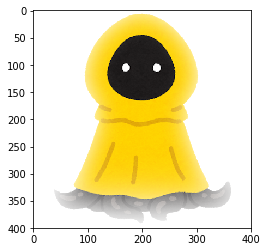

In [20]:
char_img = Image.open('cahr_haster.png')
plt.imshow(char_img)
plt.plot

In [27]:
char_img.size

(400, 400)

<function matplotlib.pyplot.plot>

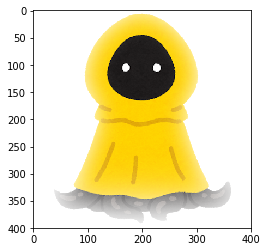

In [28]:
cv_char = np.asarray(char_img)
plt.imshow(cv_char)
plt.plot

In [29]:
char_h, char_w = cv_char.shape[:2]

In [30]:
type(cv_char)

numpy.ndarray

In [31]:
aspect_ratio = char_w / char_h

In [32]:
theta = math.atan(aspect_ratio)
cos_theta = math.cos(theta)
sin_theta = math.sin(theta)
theta, cos_theta, sin_theta

(0.7853981633974483, 0.7071067811865476, 0.7071067811865475)

In [33]:
char_m_h = int(2*radian * cos_theta)
char_m_w = int(2*radian * sin_theta)
char_m_h, char_m_w

(196, 196)

[]

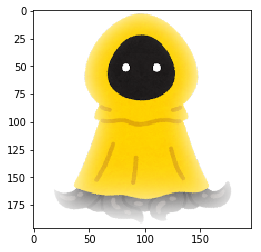

In [34]:
cv_char_resize = cv2.resize(cv_char, (char_m_h, char_m_w), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv_char_resize)
plt.plot()

In [39]:
cv_char_resize.shape

(196, 196, 4)

In [40]:
a = char_img.resize((char_m_w, char_m_h), Image.BICUBIC)
a.size

(196, 196)

[]

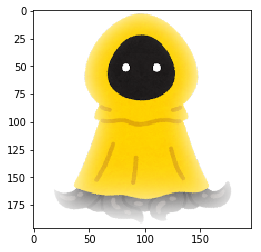

In [36]:
char_resize = Image.fromarray(cv_char_resize, 'RGBA')
plt.imshow(char_resize)
plt.plot()

In [37]:
h, w = char_resize.size
char_center_pt = (int(x_max - w / 2), int(y_max - h / 2))

[]

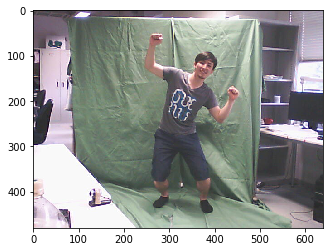

In [31]:
# layer1と同じ大きさの画像を全面透過で作成
layer1 = Image.open('test_tao3.jpg')
plt.imshow(layer1)
plt.plot()

[]

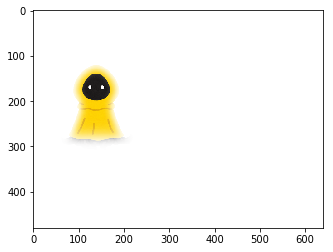

In [32]:
c = Image.new('RGBA', layer1.size, (255, 255,255, 0))
c.paste(char_resize, char_center_pt, mask=char_resize)
plt.imshow(c)
plt.plot()

[]

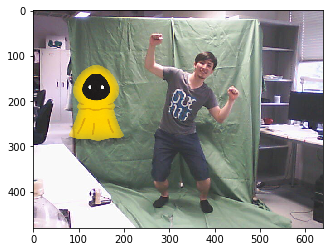

In [33]:
# result = Image.alpha_composite(layer1, )
layer1.paste(char_resize, char_center_pt, char_resize)
plt.imshow(layer1)
plt.plot()

In [34]:
layer1.save("montaged_charcter.png", quality=95)